<a href="https://colab.research.google.com/github/iaglourenco/fiap-tech-challenges/blob/main/Tech_Challenge_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Previsão de Custos Médicos

Neste notebook, vamos desenvolver um modelo de regressão para prever o valor dos encargos médicos individuais cobrados por seguradoras. Utilizaremos a base de dados "[Medical Insurance Cost Prediction](https://www.kaggle.com/datasets/rahulvyasm/medical-insurance-cost-prediction)" do Kaggle, que contém informações de idade, gênero, IMC, número de filhos, hábito de fumar e região.

As principais etapas são:
1. Exploração de dados
2. Pré-processamento
3. Modelagem e treinamento
4. Avaliação de desempenho
5. Validação estatística
6. Conclusões


## **Exploração de dados** 🤓

In [ ]:
import pandas as pd

df = pd.read_csv('medical_insurance.csv')

**Descrição das colunas**
- `age`: idade do segurado em anos;
- `sex`: gênero (`male` ou `female`);
- `bmi`: índice de massa corporal;
- `children`: número de filhos cobertos;
- `smoker`: indicador de fumante (`yes`/`no`);
- `region`: região de residência;
- `charges`: valor dos encargos médicos.

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Informações gerais sobre as colunas

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


Observamos anteriormente que não temos nulos na base, porém, apenas reforçando

In [ ]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


Estatísticas descritivas das colunas numéricas

In [ ]:
df.describe()

,age,bmi,children,charges
count,2772.000000,2772.000000,2772.000000,2772.000000
mean,39.109668,30.701349,1.101732,13261.369959
std,14.081459,6.129449,1.214806,12151.768945
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.220000,0.000000,4687.797000
50%,39.000000,30.447500,1.000000,9333.014350
75%,51.000000,34.770000,2.000000,16577.779500
max,64.000000,53.130000,5.000000,63770.428010


Observamos acima que a idade inclui adultos entre 18 e 64 anos. A inclusão de dados para faixas etárias além de 64 anos é fundamental para obter uma representação mais completa e precisa da população, refletindo a realidade do aumento da longevidade e evitando vieses em análises demográficas e sociais.


Analisando algumas distribuições dos dados com histogramas:

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'children'}>,
        <Axes: title={'center': 'charges'}>]], dtype=object)

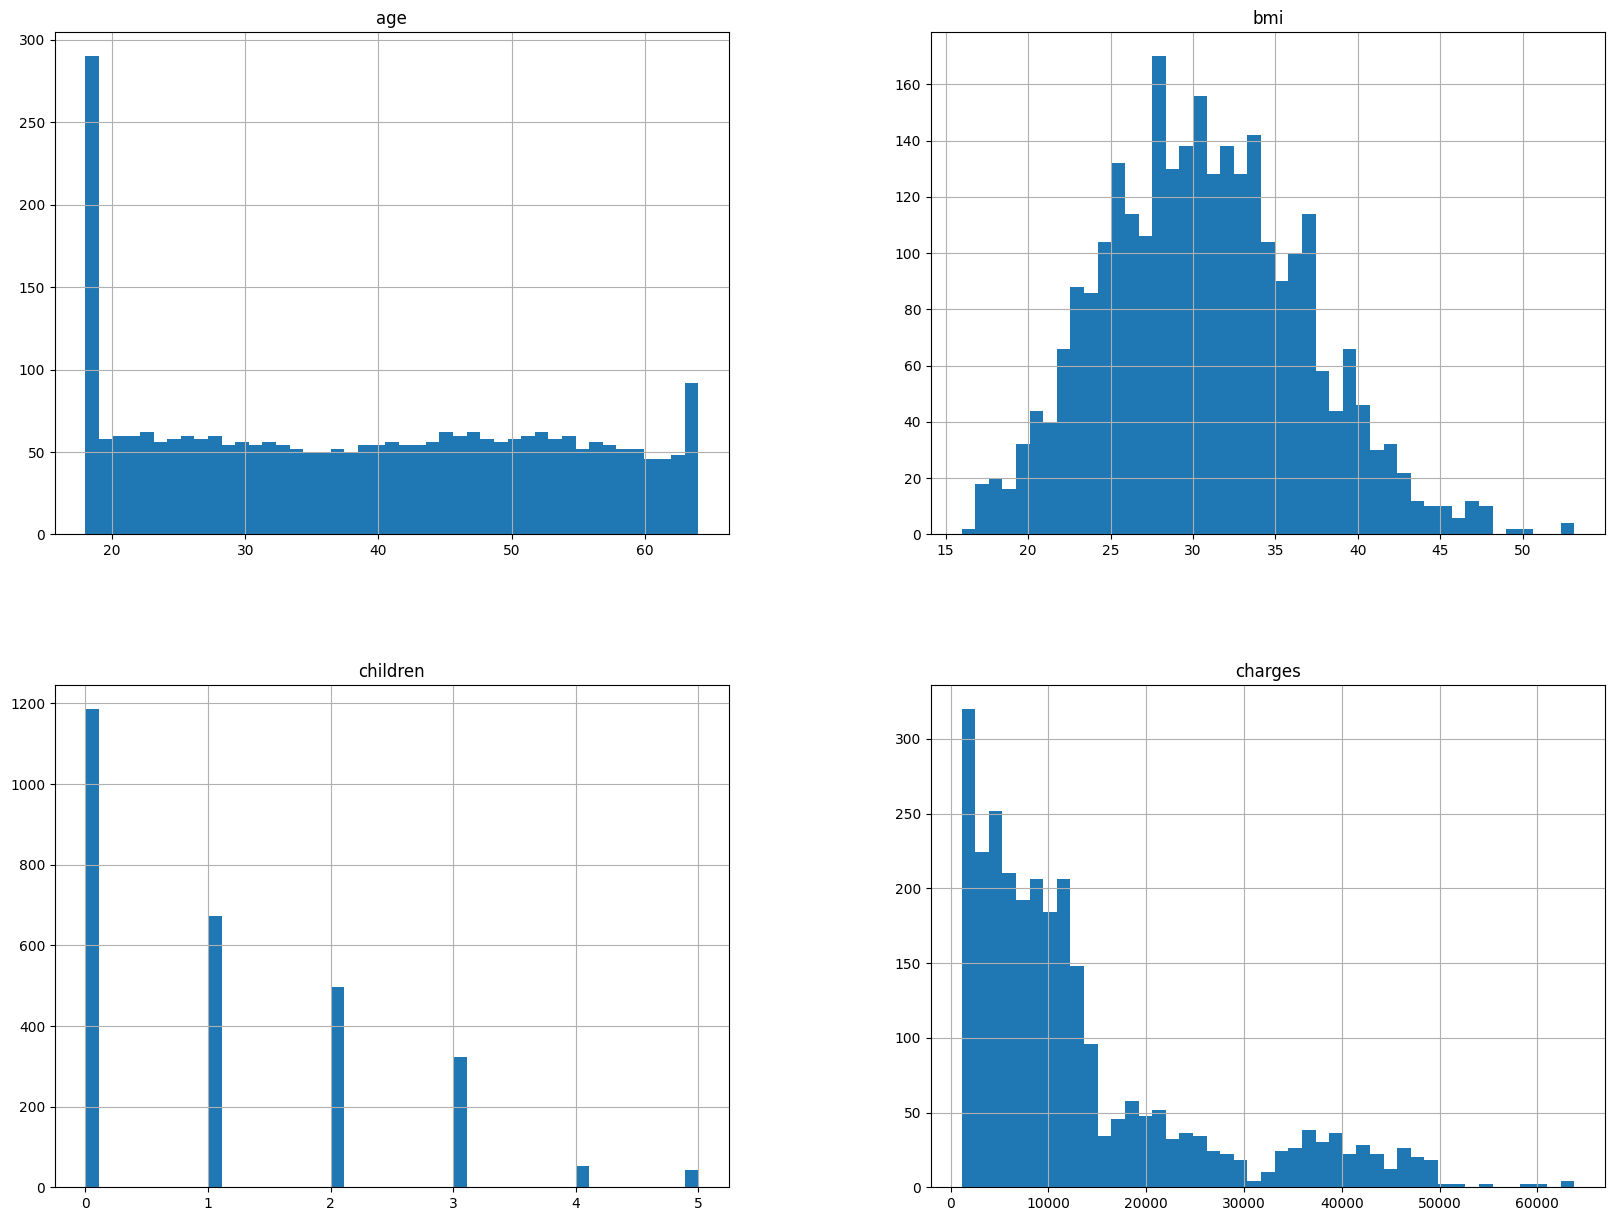

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


df.hist(bins=45, figsize=(20,15))



*   Primeiramente podemos verificar bastante assimetria nos dados
*   Para a idade podemos verificar uma espécie de pico nos mais jovens e não temos muitos dados acima de 60 anos
*   Para a massa corporal podemos identificar que as amostras tendem ao sobrepeso ou superior
*   Para o número de filhos podemos notar que a base é composta por maioria de pessoas com poucos filhos
*   Para os valores do seguro de saúde podemos notar que temos uma tendência de valores menores e também que de certa forma acompanham os gráficos de idade e filhos

Valor do seguro por sexo

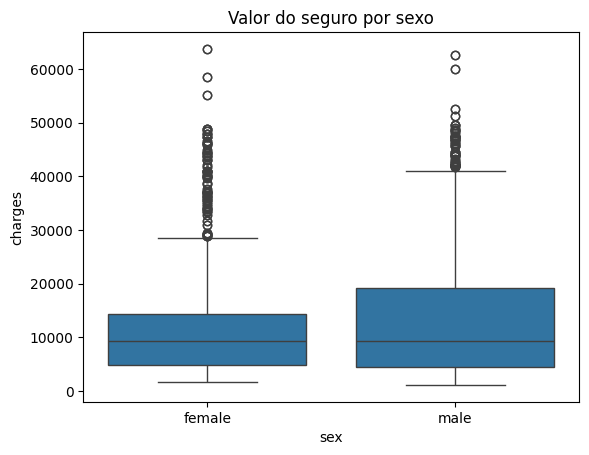

In [ ]:
sns.boxplot(x='sex', y='charges', data=df)
plt.title('Valor do seguro por sexo')
plt.show()

*   Pode-se notar que não existe uma variação extrema ou viés de custos por sexo apesar de que para homes os custos são um pouco maiores

Valor do seguro por fumante

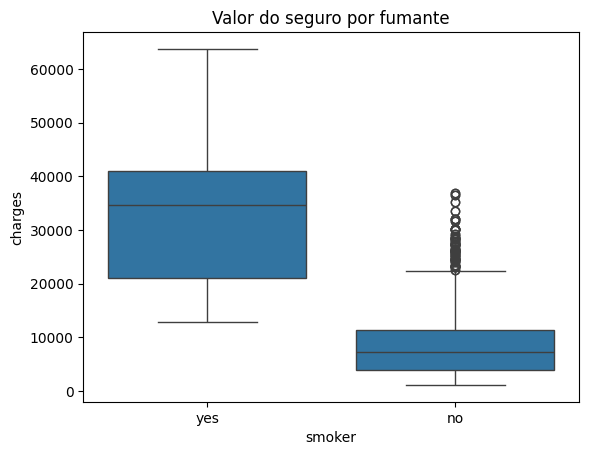

In [ ]:
sns.boxplot(x='smoker', y='charges', data=df)
plt.title('Valor do seguro por fumante')
plt.show()

*   Pode-se notar que existe uma relação forte entre fumantes e custos mais altos

Valor do seguro por região

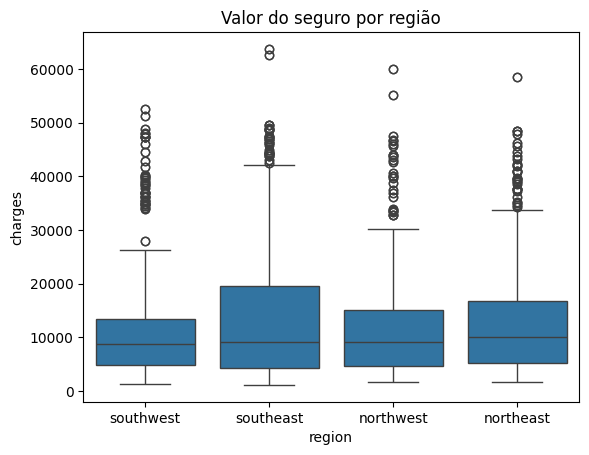

In [ ]:
sns.boxplot(x='region', y='charges', data=df)
plt.title('Valor do seguro por região')
plt.show()

*   Pode-se notar que não existe uma variação extrema ou viés de custos por região apesar do sudeste ter um pequeno desvio em relação às demais regiões

Relação entre massa corporal e valor do seguro, separados por hábito de fumar

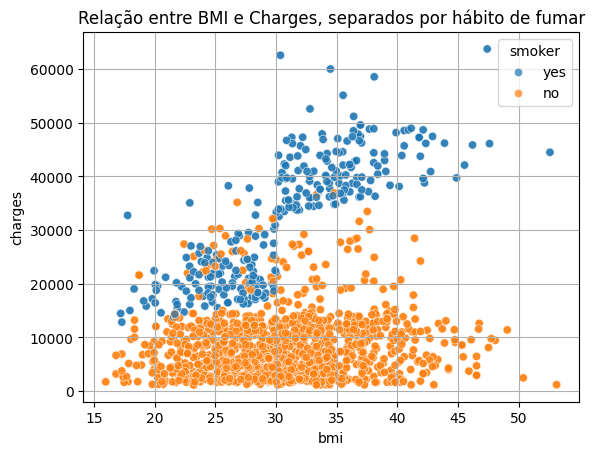

In [ ]:
sns.scatterplot(data=df, x='bmi', y='charges', hue='smoker', alpha=0.7)
plt.title('Relação entre BMI e Charges, separados por hábito de fumar')
plt.grid(True)
plt.show()

*   Não temos uma relação muito forte nos dados entre massa corporal e o custo do seguro, porém, novamente os valores se destacam muito para os fumantes

Relação entre idade e valor do seguro, separados por hábito de fumar

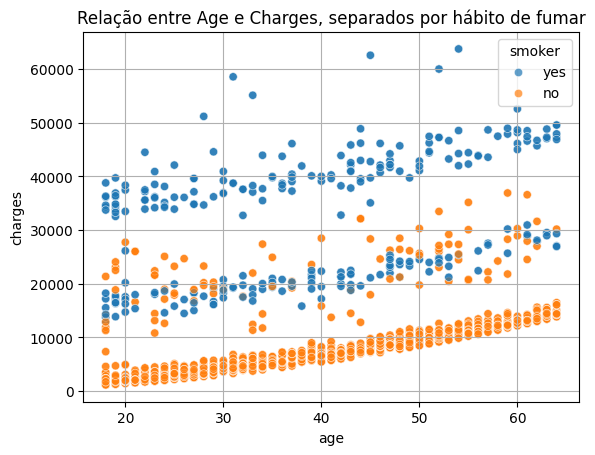

In [ ]:
sns.scatterplot(data=df, x='age', y='charges', hue='smoker', alpha=0.7)
plt.title('Relação entre Age e Charges, separados por hábito de fumar')
plt.grid(True)
plt.show()

*   Podemos notar que temos uma relação nos dados entre idade e o custo do seguro ainda que suave, porém, novamente os valores se destacam muito para os fumantes

Relação entre região e valor do seguro, separados por hábito de fumar

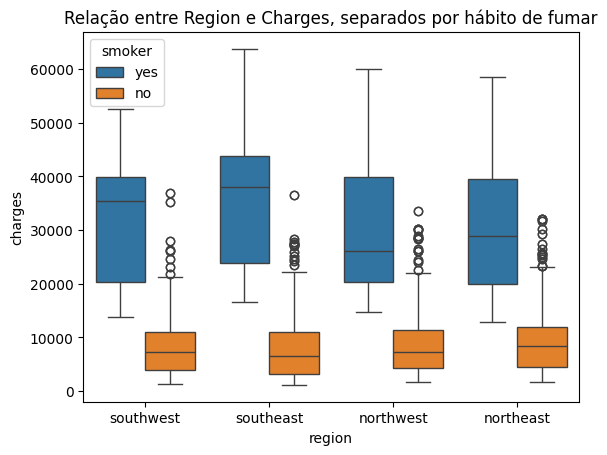

In [ ]:
sns.boxplot(data=df, x='region', y='charges', hue='smoker')
plt.title('Relação entre Region e Charges, separados por hábito de fumar')
plt.show()

*   Novamente não há uma variação de custos muito grande por região, podém, desta vez podemos notar que a variação de custos do sudeste para as demais regiões pode estar relacionada ao número maior de fumantes

Preparando os dados para uma matriz de correlação como forma de entender melhor como os dados se relacionam

In [ ]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)

categorical_cols = ['sex', 'smoker', 'region']

encoded_cols = encoder.fit_transform(df[categorical_cols])

encoded_df = pd.DataFrame(encoded_cols, columns=encoder.get_feature_names_out(categorical_cols))

df_encoded = pd.concat([df, encoded_df], axis=1)

df_encoded.drop(categorical_cols, axis=1, inplace=True)

df_encoded = df_encoded[[col for col in df_encoded.columns if col != 'charges'] + ['charges']]

df_encoded.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,charges
0,19,27.900,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,16884.92400
1,18,33.770,1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1725.55230
2,28,33.000,3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,4449.46200
3,33,22.705,0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,21984.47061
4,32,28.880,0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,3866.85520


Matriz de Correlação Geral apenas para visualização de como as variáveis se influenciam para mais ou para menos

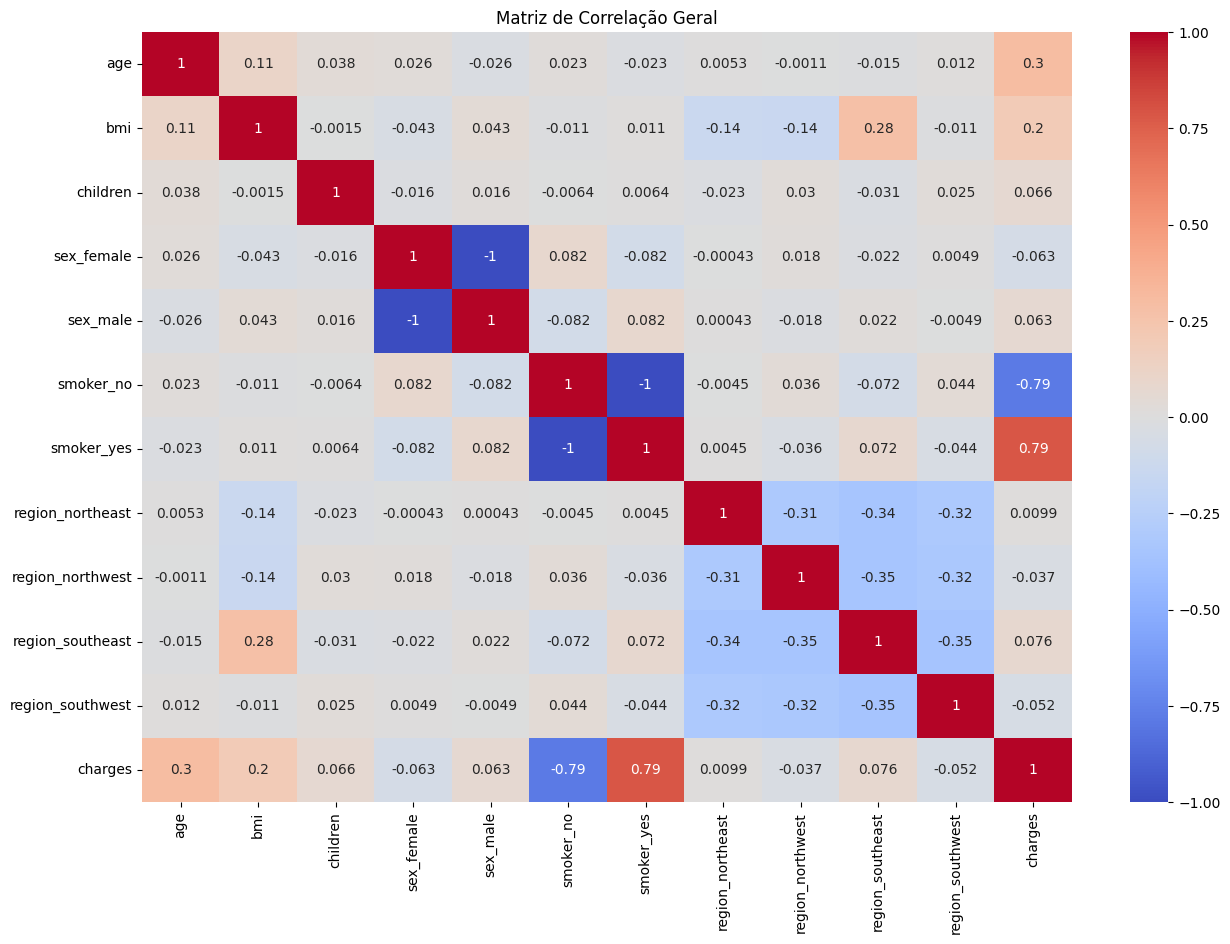

In [ ]:
correlation_matrix = df_encoded.corr(numeric_only=True)

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação Geral')
plt.show()

*   Considerações da matriz

Matriz de Correlação Específica dos valores que mais se destacaram no geral

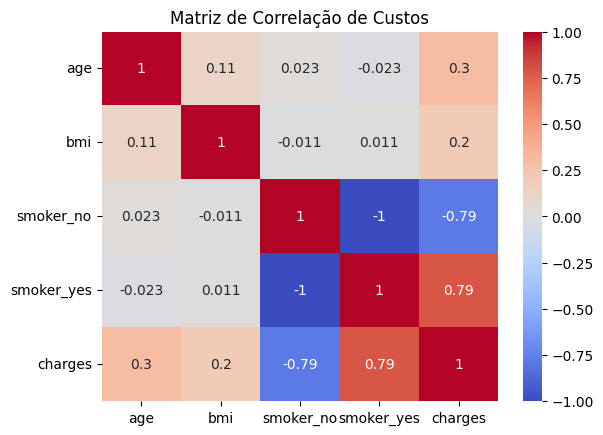

In [ ]:
smoker_df = df_encoded[['age', 'bmi', 'smoker_no', 'smoker_yes', 'charges']]

smoker_correlation = smoker_df.corr(numeric_only=True)

sns.heatmap(smoker_correlation, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação de Custos')
plt.show()

*   Considerações da matriz

## **Pré-processamento de dados** ⚙️

A base de dados selecionada não possui valores ausentes ou nulos, portanto, esse tratamento não se faz necessário.

Testando OneHotEncoder

In [ ]:
from sklearn.preprocessing import OneHotEncoder

onehot = OneHotEncoder(sparse_output=False,drop='first')

categorical_cols = ['sex', 'smoker', 'region']

encoded_cols = onehot.fit_transform(df[categorical_cols])

encoded_df = pd.DataFrame(encoded_cols, columns=onehot.get_feature_names_out(categorical_cols))

encoded_df.head()

,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,0.0,1.0,0.0,0.0,1.0
1,1.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,1.0,0.0
3,1.0,0.0,1.0,0.0,0.0
4,1.0,0.0,1.0,0.0,0.0


Testando StandardScaler

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

numerical_cols = ['age', 'bmi', 'children']

scaled_cols = scaler.fit_transform(df[numerical_cols])

scaled_cols_df = pd.DataFrame(scaled_cols, columns=numerical_cols)

scaled_cols_df.head()

,age,bmi,children
0,-1.428353,-0.457114,-0.907084
1,-1.499381,0.500731,-0.083758
2,-0.789099,0.375085,1.562893
3,-0.433959,-1.304814,-0.907084
4,-0.504987,-0.297201,-0.907084


Criando então a pipeline de pré-processamento dos dados

In [ ]:
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer([('categorical', onehot, categorical_cols)])

data_prepared = preprocessor.fit_transform(df)

df_prepared = pd.DataFrame(data_prepared, columns=onehot.get_feature_names_out(categorical_cols))

df_prepared = pd.concat([df[numerical_cols], df_prepared, df['charges']], axis=1)

df_prepared.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,charges
0,19,27.900,0,0.0,1.0,0.0,0.0,1.0,16884.92400
1,18,33.770,1,1.0,0.0,0.0,1.0,0.0,1725.55230
2,28,33.000,3,1.0,0.0,0.0,1.0,0.0,4449.46200
3,33,22.705,0,1.0,0.0,1.0,0.0,0.0,21984.47061
4,32,28.880,0,1.0,0.0,1.0,0.0,0.0,3866.85520


## **Modelagem e Treinamento** 📈

Criando as bases de treinamento e teste

In [ ]:
from sklearn.model_selection import train_test_split

X = df_prepared.drop('charges', axis=1)
y = df_prepared['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Criando os modelos que serão utilizados e executando o treinamento dos mesmos

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

models = {
    "Random Forest": RandomForestRegressor(),
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "KNN": KNeighborsRegressor(),
    "XGBoost": XGBRegressor()
}

for name, model in models.items():
  model.fit(X_train, y_train)

Executando e coletando os resultados das predições

In [ ]:
predictions = {}

for name, model in models.items():
  predictions[name] = model.predict(X_test)

Gerando métricas para avaliação dos modelos

In [ ]:
def calculate_mape(labels, predictions):
    errors = np.abs(labels - predictions)
    relative_errors = errors / np.abs(labels)
    mape = np.mean(relative_errors) * 100
    return mape

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

results = []

for name, prediction in predictions.items():
  mae = mean_absolute_error(y_test, prediction)
  mse = mean_squared_error(y_test, prediction)
  rmse = np.sqrt(mean_squared_error(y_test, prediction))
  r2 = r2_score(y_test, prediction)

  results.append({
      'Modelo': name,
      'R²': r2,
      'MAE': mae,
      'MSE': mse,
      'RMSE': np.sqrt(rmse),
      'Mape': calculate_mape(y_test, prediction)
      })



## **Validação e estatística** 📐

Exibindo os valores das métricas

In [ ]:
resultados_df = pd.DataFrame(results).sort_values(by='R²', ascending=False)
resultados_df.reset_index(drop=True, inplace=True)
resultados_df

,Modelo,R²,MAE,MSE,RMSE,Mape
0,XGBoost,0.941235,1404.378110,9.194947e+06,55.066478,19.849374
1,Random Forest,0.932063,1494.723836,1.063006e+07,57.099715,18.575766
2,Decision Tree,0.922985,735.264994,1.205045e+07,58.918381,9.655731
3,Linear Regression,0.744331,4224.767553,4.000420e+07,79.529158,44.531786
4,KNN,0.406253,6045.560658,9.290283e+07,98.176429,67.236194


# Pódio dos modelos

## 🥇 XGBoost
Melhor R²: Explica 94,1% da variância! Top demais.

Erros MAE/RMSE baixos, com um bom equilíbrio geral.

Mesmo com MAPE um pouco mais alto que a Random Forest e Decision Tree, é o mais consistente e equilibrado.

## 🥈 Random Forest
Quase tão bom quanto o XGBoost em R² e RMSE.

MAPE mais baixo que o XGBoost, mas MAE e RMSE ligeiramente piores.

Robusto, estável e ótimo para interpretar com ferramentas como feature importance.

## 🥉 Decision Tree
MAE e MAPE baixos! Excelente para previsões pontuais em alguns casos.

R² e RMSE mostram que ele erra em alguns outliers, o que aumenta o MSE.

Pode ter overfitting — aprende bem o treino, mas talvez não generalize tão bem.

In [ ]:

import statsmodels.api as sm

df_stat = df_prepared.drop('charges', axis=1)
df_stat_label = df_prepared['charges']

df_stat = sm.add_constant(df_stat)

model = sm.OLS(df_stat_label, df_stat).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     1041.
Date:                Sat, 24 May 2025   Prob (F-statistic):               0.00
Time:                        12:37:57   Log-Likelihood:                -28078.
No. Observations:                2772   AIC:                         5.617e+04
Df Residuals:                    2763   BIC:                         5.623e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.164e+04    686.885  

Avaliando o modelo de Linear Regression usando OLS (Ordinary Least Squares)

🔥 Variáveis com impacto relevante e significância estatística (p < 0.05):

| Variável              | Interpretação |
| --------------------- | -------------------------------------------------- |
| **age**               | Cada ano a mais na idade aumenta, em média, R\$ 255,58 nos `charges`.           |
| **bmi**               | Cada ponto de IMC eleva o custo em R\$ 330,02 — sobrepeso pesa literalmente.    |
| **children**          | Ter mais um filho aumenta o custo em \~R\$ 506. Dá pra sentir no bolso.         |
| **smoker\_yes**       | Fumar aumenta os custos em  R\$ 23.980! O maior impacto de todos. |
| **region\_southeast** | Morar no sudeste reduz os custos em \~R\$ 1.078.                                |
| **region\_southwest** | Morar no sudoeste reduz os custos em \~R\$ 1.055.                               |

🤷 Variáveis não significativas (p > 0.05):

| Variável              | Interpretação                                                                            |
| --------------------- | ---------------------------------------------------------------------------------------- |
| **sex\_male**         | Ser homem não tem efeito estatístico nos `charges`. |
| **region\_northwest** | Não há evidência forte de que essa região tenha um custo diferente da base. |



# Conclusões e Próximos Passos

## Resumo de Insights
- Fumantes tem impacto médio de +R$ 23.980 no custo
- Idade e BMI também influenciam mas com efeito menor.

## Próximos passos

- Base até 64 anos (expandir faixa etária)
- Inclusão de variáveis socioeconômicas